In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
plt.style.use('fivethirtyeight')

jupyter nbextension enable --py widgetsnbextension

In [2]:
df = pd.read_excel('Pecem_19.xlsx')
df.tail()

,Excesso_O2,T_out_coal_mill_A,Mill_A_classifier_velocity,Secondary_air_flow_A,Pressao_do_coletor_de_Ar_Secundario,Pressao_do_coletor_de_Ar_Primario,Flow_primary_air_Mill_A,Efficiency
6680,1.52760,78.22266,109.81761,72.08643,16.22159,89.27490,23.86728,84.827
6681,1.58930,78.22266,109.55209,71.19142,16.31651,88.74727,23.69873,84.845
6682,1.55646,78.22266,109.45068,71.10107,16.40381,88.99776,23.70218,84.905
6683,1.53290,78.22266,109.45068,71.16896,16.29375,88.91680,23.79477,84.439
6684,1.33080,78.22266,109.79638,71.37047,16.32463,88.32266,23.83669,84.346


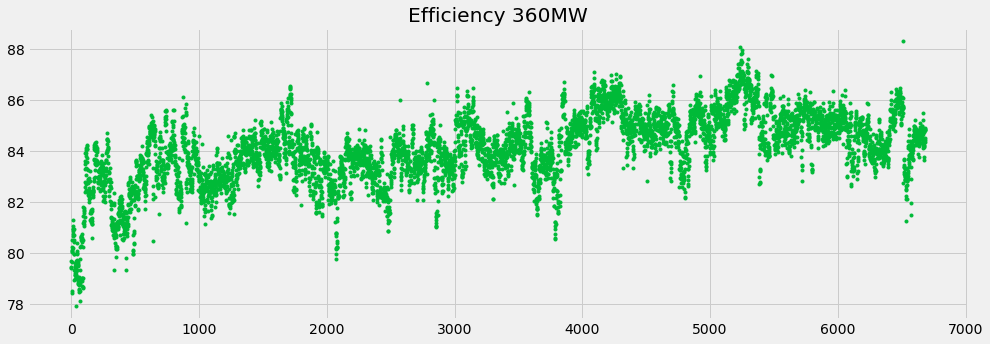

In [3]:
df_ = df['Efficiency']
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df_.plot(style='.', figsize=(15,5), color=color_pal[3], title='Efficiency 360MW')


In [4]:
train_dataset = df.sample(frac=0.9,random_state=0)
test_dataset = df.drop(train_dataset.index)
print(len(train_dataset), 'train examples')
print(len(test_dataset), 'test examples')

6016 train examples
669 test examples


In [5]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Excesso_O2,6016.0,2.006851,0.380094,1.00100,1.742848,2.025145,2.299613,3.42856
T_out_coal_mill_A,6016.0,76.907425,2.371744,65.11230,75.292970,77.050780,78.810573,84.74708
Mill_A_classifier_velocity,6016.0,104.285563,2.501826,89.50849,103.532753,104.737790,105.228623,113.26989
Secondary_air_flow_A,6016.0,70.589192,2.614973,58.04786,68.881505,70.934225,72.463853,80.54581
Pressao_do_coletor_de_Ar_Secundario,6016.0,17.053473,1.311198,15.49751,16.245120,16.564305,17.514538,23.77950
Pressao_do_coletor_de_Ar_Primario,6016.0,77.443520,2.541434,75.01723,76.109352,76.389370,77.895480,90.98161
Flow_primary_air_Mill_A,6016.0,23.392522,0.735040,21.59901,22.885162,23.300675,23.697898,27.77773
Efficiency,6016.0,84.089011,1.371378,77.92800,83.296000,84.155000,85.034000,88.31400


In [6]:
train_labels = train_dataset.pop('Efficiency')
test_labels = test_dataset.pop('Efficiency')

In [7]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
normed_train_data = scaler.fit_transform(train_dataset)
normed_test_data = scaler.fit_transform(test_dataset)

In [8]:
train_pool = Pool(normed_train_data, 
                  train_labels)
test_pool = Pool(normed_test_data, 
                  test_labels) 

In [9]:
model = CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=normed_train_data, 
                                       y=train_labels, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7124959362
bestIteration = 999

0:	loss: 0.7124959	best: 0.7124959 (0)	total: 2.57s	remaining: 1m 14s

bestTest = 0.6543913711
bestIteration = 999

1:	loss: 0.6543914	best: 0.6543914 (1)	total: 5.28s	remaining: 1m 13s

bestTest = 0.7340931342
bestIteration = 999

2:	loss: 0.7340931	best: 0.6543914 (1)	total: 8.32s	remaining: 1m 14s

bestTest = 0.6727838896
bestIteration = 992

3:	loss: 0.6727839	best: 0.6543914 (1)	total: 11.3s	remaining: 1m 13s

bestTest = 0.7524966001
bestIteration = 999

4:	loss: 0.7524966	best: 0.6543914 (1)	total: 14.4s	remaining: 1m 12s

bestTest = 0.6929455381
bestIteration = 997

5:	loss: 0.6929455	best: 0.6543914 (1)	total: 16.7s	remaining: 1m 6s

bestTest = 0.7575324258
bestIteration = 999

6:	loss: 0.7575324	best: 0.6543914 (1)	total: 18.9s	remaining: 1m 1s

bestTest = 0.704007285
bestIteration = 999

7:	loss: 0.7040073	best: 0.6543914 (1)	total: 21s	remaining: 57.9s

bestTest = 0.7685783442
bestIteration = 998

8:	loss: 0.7685783	best: 0.65439

In [12]:
print_cv_summary(cv_data)

NameError: name 'print_cv_summary' is not defined

In [10]:
preds = model.predict(normed_test_data).flatten()
rmse = np.sqrt(mean_squared_error(test_labels, preds))
mae = mean_absolute_error(test_labels, preds)
r2 = r2_score(test_labels, preds)

print("MAE: %f" % (mae))
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))

MAE: 0.449194
RMSE: 0.578865
R2: 0.801503


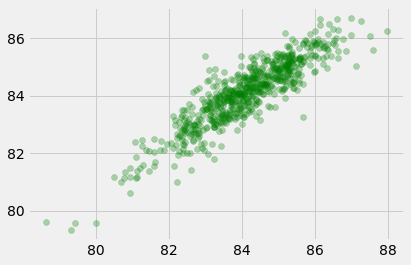

In [11]:
import matplotlib.pyplot as plt
plt.scatter(test_labels, preds, alpha = 0.3, c = 'g')

for x, y in zip(y_test, preds):
    print("%4.5f - %4.5f" % (x,y))

**Análise resultados**

https://catboost.ai/docs/concepts/python-reference_catboostregressor_calc_feature_statistics.html

In [12]:
res = model.calc_feature_statistics(normed_train_data,
                                    train_labels,
                                    feature=2,
                                    plot=True)

**Novo Dataset**

In [13]:
new_input = pd.read_excel('pecem_18_2.xlsx')
new_input.tail()

,Excesso_O2,T_out_coal_mill_A,Mill_A_classifier_velocity,Secondary_air_flow_A,Pressao_do_coletor_de_Ar_Secundario,Pressao_do_coletor_de_Ar_Primario,Flow_primary_air_Mill_A,Efficiency
2710,3.311741,65.512292,103.999836,82.577429,18.016176,85.580314,22.843026,70.951371
2711,3.225974,65.808884,104.002094,82.262888,17.873719,85.056291,22.815615,71.173679
2712,3.257794,66.281206,103.946535,82.215608,17.928743,84.842473,22.816798,70.946039
2713,3.215371,66.284180,104.005314,82.109817,18.969089,85.079287,22.767497,71.135743
2714,3.166152,66.284180,104.034365,81.239180,20.697791,84.953304,22.846804,70.717599


In [14]:
X_new_input = new_input.drop('Efficiency', axis =1)

In [15]:
X_new = scaler.fit_transform(X_new_input)
y_new= new_input['Efficiency']

In [16]:
new_y= model.predict(X_new).flatten()

In [17]:
print(*new_y, sep = "\n") 

83.62518772210964
82.30770026381205
82.29757666825306
82.56537219544319
82.28909330220893
82.46867107958174
82.39460824919242
82.71064824543268
82.784711075822
82.71064824543268
83.61852309528057
83.61852309528057
83.58480344696952
82.82684089053129
82.73137540857749
82.35761042323136
82.26996019622578
82.30753683549574
82.28551352866214
82.29099760258147
82.2384320530261
82.31030537541616
82.444479816847
82.34349787961487
82.44492469694454
82.32345424365597
82.23654214381152
82.06656989302117
82.4778511989929
82.36004874571832
82.76889172920309
82.76889172920309
82.76889172920309
82.74964238245752
83.42695348994823
82.74964238245752
82.36004874571832
82.4778511989929
82.46877916935655
82.65098250420793
82.44402586997084
82.44402586997084
82.38411225938009
82.3989508720519
82.76889172920309
82.74964238245752
82.38312063477181
82.68957933776888
82.67416116498202
82.38312063477181
82.38312063477181
82.68957933776888
82.67416116498202
82.67416116498202
83.41153531716138
83.42695348994823


81.74761026645618
81.76823138181685
81.80601109101906
81.80601109101906
81.76199410148287
82.05401122659853
82.19832420898591
82.4902281401191
83.33861175427636
83.49193586812567
83.1976826968332
83.09061161869688
83.023977894033
83.0830002522436
83.0830002522436
83.0830002522436
83.25109830755106
83.18945283537964
83.74298843164404
83.52625700096839
82.76810755669916
81.94242780072682
82.13377825586302
81.9207072893636
81.86621385816022
81.81169515610436
82.06772625141535
82.06772625141535
81.93822836328485
81.9471696198555
82.00802618792937
81.59234249585161
81.91940048455939
82.14821288432019
82.0883134018036
82.3620976634206
82.54714248089361
83.19547052588209
83.19547052588209
82.46393029222472
82.96407841151641
82.96407841151641
83.0830002522436
83.09061161869688
83.20953345942408
83.16551646988788
83.16551646988788
83.45753359500354
83.45753359500354
83.31241779199667
83.10707774528973
83.07267928292863
83.25772410040165
83.29938339211185
83.64477176528828
83.58876709158211
83.5

In [18]:
test= pd.read_excel('pecem_18_2.xlsx')
real = test['Efficiency']

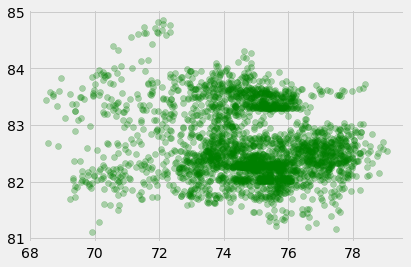

In [19]:
plt.scatter(real, new_y, alpha = 0.3, c = 'g')

In [20]:
rmse = np.sqrt(mean_squared_error(real, new_y))
mae = mean_absolute_error(real, new_y)
r2 = r2_score(real, new_y)

print("MAE: %f" % (mae))
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))

MAE: 7.885172
RMSE: 8.152236
R2: -17.954071
